In [31]:
# COVID19-EDA PROJECT by alfiyabegum
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# display settings
pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['figure.dpi'] = 100

print("Libraries imported — numpy {}, pandas {}, seaborn available, sklearn available.".format(np.__version__, pd.__version__))


Libraries imported — numpy 2.0.2, pandas 2.2.2, seaborn available, sklearn available.


In [32]:
import urllib.request
import os
import zipfile
import pandas as pd

DATA_FOLDER = "data"
ZIP_FILENAME = "owid-covid-data.zip"

# ✅ Use raw GitHub URL (not the HTML page)
zip_url = "https://github.com/FKJ5567/COVID19-EDA/raw/main/data/owid-covid-data.zip"
zip_path = os.path.join(DATA_FOLDER, ZIP_FILENAME)

# Create data folder if not exists
os.makedirs(DATA_FOLDER, exist_ok=True)

# ✅ Download only if the zip file doesn't exist
if not os.path.exists(zip_path):
    urllib.request.urlretrieve(zip_url, zip_path)
    print(f"Downloaded {ZIP_FILENAME} from GitHub")

# ✅ Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(DATA_FOLDER)
    print(f"Extracted {ZIP_FILENAME} to {DATA_FOLDER}")

# ✅ Find the CSV file inside extracted folder and load it
for file_name in os.listdir(DATA_FOLDER):
    if file_name.endswith(".csv"):
        csv_path = os.path.join(DATA_FOLDER, file_name)
        df = pd.read_csv(csv_path)
        print("DataFrame created successfully from GitHub!")
        print(df.head())
        break


BadZipFile: File is not a zip file

In [ ]:
try:
    df = pd.read_csv(zip_path_path, parse_dates=['date'], low_memory=False)
    print("Loaded with parse_dates=['date']")
except Exception:
    df = pd.read_csv(zip_path, low_memory=False)
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
    print("Loaded without parse_dates (fallback)")

print("Dataset shape:", df.shape)


Loaded with parse_dates=['date']
Dataset shape: (350085, 67)


In [ ]:
cols_keep = [
    'iso_code','continent','location','date',
    'total_cases','new_cases','total_deaths','new_deaths',
    'total_vaccinations','people_vaccinated','people_fully_vaccinated',
    'new_vaccinations','stringency_index','population'
]
cols_existing = [c for c in cols_keep if c in df.columns]
df = df[cols_existing].copy()
print("Columns kept:", cols_existing)
print("New shape:", df.shape)


Columns kept: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'stringency_index', 'population']
New shape: (350085, 14)


In [ ]:
print("First 5 rows:")
display(df.head())

print("\nData types:")
print(df.dtypes)

if 'date' in df.columns:
    print("\nDate range:", df['date'].min(), "to", df['date'].max())
print("\nUnique locations:", df['location'].nunique())


First 5 rows:


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index,population
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,41128772.0
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,41128772.0
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,41128772.0
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,41128772.0
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,41128772.0



Data types:
iso_code                           object
continent                          object
location                           object
date                       datetime64[ns]
total_cases                       float64
new_cases                         float64
total_deaths                      float64
new_deaths                        float64
total_vaccinations                float64
people_vaccinated                 float64
people_fully_vaccinated           float64
new_vaccinations                  float64
stringency_index                  float64
population                        float64
dtype: object

Date range: 2020-01-01 00:00:00 to 2023-10-24 00:00:00

Unique locations: 255


Missing values per column:
 iso_code                        0
continent                   16665
location                        0
date                            0
total_cases                 37997
new_cases                    9628
total_deaths                59584
new_deaths                   9574
total_vaccinations         270777
people_vaccinated          274174
people_fully_vaccinated    277510
new_vaccinations           284739
stringency_index           152434
population                      0
dtype: int64


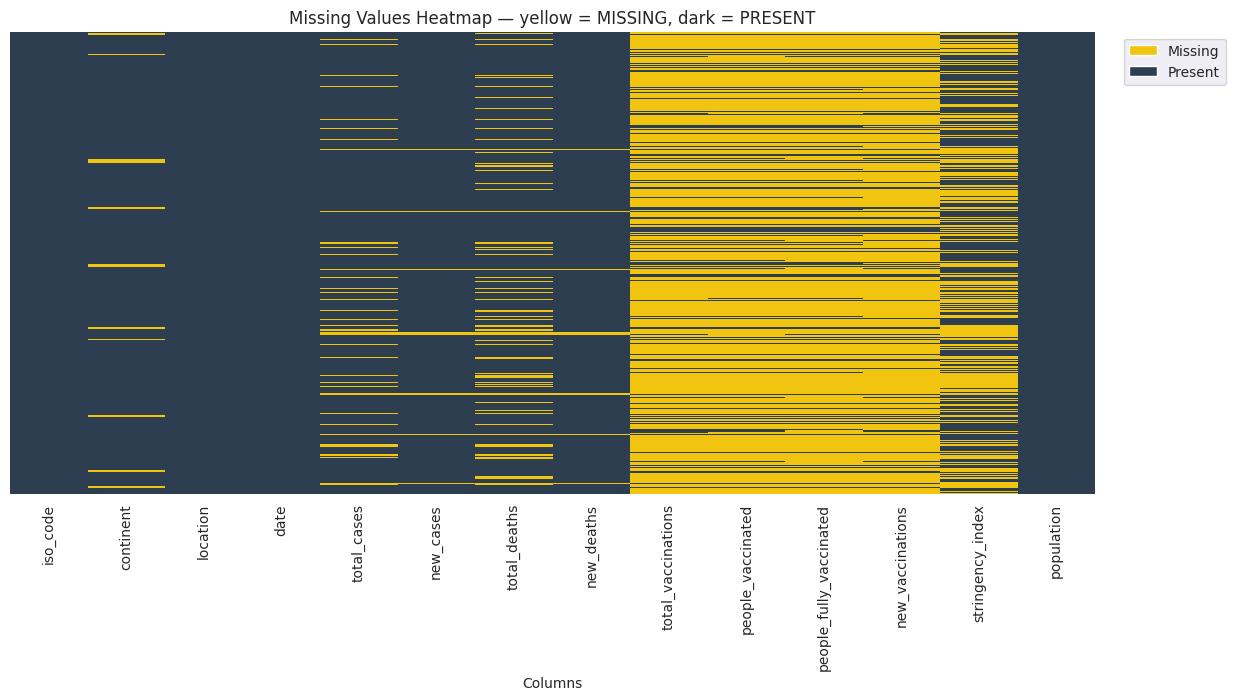

In [ ]:
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

m = df.isnull().astype(int)  # 1 = missing, 0 = present
present_color = '#2c3e50'
missing_color = '#f1c40f'
cmap = ListedColormap([present_color, missing_color])

plt.figure(figsize=(14,6))
sns.heatmap(m, cmap=cmap, cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap — yellow = MISSING, dark = PRESENT")

legend_handles = [
    Patch(facecolor=missing_color, label='Missing'),
    Patch(facecolor=present_color, label='Present')
]
plt.legend(handles=legend_handles, bbox_to_anchor=(1.02,1), loc='upper left')
plt.xlabel("Columns")
plt.show()


In [ ]:
# Numeric columns -> mean
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if num_cols:
    df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
    print("Filled numeric columns with mean:", num_cols)

# Categorical/object columns -> mode
obj_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for c in obj_cols:
    if df[c].isnull().any():
        modes = df[c].mode()
        if len(modes) > 0:
            df[c].fillna(modes[0], inplace=True)
        else:
            df[c].fillna("Unknown", inplace=True)
print("Filled categorical columns (mode).")

print("\nMissing values after filling:")
print(df.isnull().sum())


Filled numeric columns with mean: ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'stringency_index', 'population']
Filled categorical columns (mode).

Missing values after filling:
iso_code                   0
continent                  0
location                   0
date                       0
total_cases                0
new_cases                  0
total_deaths               0
new_deaths                 0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
new_vaccinations           0
stringency_index           0
population                 0
dtype: int64


/tmp/ipython-input-2065305710.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(modes[0], inplace=True)


In [ ]:
if 'population' in df.columns and 'total_cases' in df.columns:
    df['cases_per_100k'] = np.where(df['population']>0, df['total_cases'] / df['population'] * 100000, np.nan)
if 'population' in df.columns and 'total_deaths' in df.columns:
    df['deaths_per_million'] = np.where(df['population']>0, df['total_deaths'] / df['population'] * 1e6, np.nan)
if 'population' in df.columns and 'people_fully_vaccinated' in df.columns:
    df['pct_fully_vaccinated'] = np.where(df['population']>0, df['people_fully_vaccinated'] / df['population'] * 100, np.nan)

print("Derived columns added when possible.")
display(df[['location','date'] + [c for c in ['cases_per_100k','deaths_per_million','pct_fully_vaccinated'] if c in df.columns]].head())


Derived columns added when possible.


,location,date,cases_per_100k,deaths_per_million,pct_fully_vaccinated
0,Afghanistan,2020-01-03,16249.826739,2091.523772,438.818898
1,Afghanistan,2020-01-04,16249.826739,2091.523772,438.818898
2,Afghanistan,2020-01-05,16249.826739,2091.523772,438.818898
3,Afghanistan,2020-01-06,16249.826739,2091.523772,438.818898
4,Afghanistan,2020-01-07,16249.826739,2091.523772,438.818898


In [ ]:
if 'date' in df.columns and 'location' in df.columns:
    latest = df.sort_values('date').groupby('location').tail(1).reset_index(drop=True)
    print("Latest snapshot computed. Shape:", latest.shape)
    display(latest.head())
else:
    raise KeyError("Dataset missing 'date' or 'location' — cannot compute latest snapshot.")


Latest snapshot computed. Shape: (255, 17)


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index,population,cases_per_100k,deaths_per_million,pct_fully_vaccinated
0,ESH,Africa,Western Sahara,2022-04-20,6.683354e+06,9601.634468,86021.804355,85.511055,4.459472e+08,1.980467e+08,1.804808e+08,800590.636795,42.714021,576005.0,1.160294e+06,149342.113966,31333.204395
1,OWID_CYN,Asia,Northern Cyprus,2022-12-06,6.683354e+06,9601.634468,86021.804355,85.511055,4.459472e+08,1.980467e+08,3.130670e+05,800590.636795,42.714021,382836.0,1.745749e+06,224696.225943,81.775747
2,MAC,Asia,Macao,2023-04-13,6.683354e+06,9601.634468,86021.804355,85.511055,1.802985e+06,6.797030e+05,6.422660e+05,800590.636795,42.714021,695180.0,9.613847e+05,123740.332511,92.388446
3,OWID_WLS,Europe,Wales,2023-07-12,6.683354e+06,9601.634468,86021.804355,85.511055,4.459472e+08,1.980467e+08,1.804808e+08,800590.636795,42.714021,3170000.0,2.108314e+05,27136.215885,5693.401387
4,HKG,Asia,Hong Kong,2023-08-31,6.683354e+06,9601.634468,86021.804355,85.511055,2.084719e+07,6.917355e+06,6.801365e+06,419.000000,42.714021,7488863.0,8.924391e+04,11486.630795,90.819728


In [ ]:
global_total_cases = latest['total_cases'].sum() if 'total_cases' in latest.columns else np.nan
global_total_deaths = latest['total_deaths'].sum() if 'total_deaths' in latest.columns else np.nan
print("Global total cases (sum of latest country totals):", int(global_total_cases) if not np.isnan(global_total_cases) else "N/A")
print("Global total deaths (sum of latest country totals):", int(global_total_deaths) if not np.isnan(global_total_deaths) else "N/A")

# Top 10 by total_cases
if 'total_cases' in latest.columns:
    top_cases = latest.sort_values('total_cases', ascending=False).head(10)[['location','total_cases','cases_per_100k']]
    print("\nTop 10 countries by total_cases (latest):")
    display(top_cases)

# Top 10 by deaths per million
if 'deaths_per_million' in latest.columns:
    top_deaths_pm = latest.sort_values('deaths_per_million', ascending=False).head(10)[['location','total_deaths','deaths_per_million']]
    print("\nTop 10 countries by deaths per million (latest):")
    display(top_deaths_pm)

# Top 10 by pct fully vaccinated
if 'pct_fully_vaccinated' in latest.columns:
    top_vax = latest.sort_values('pct_fully_vaccinated', ascending=False).head(10)[['location','pct_fully_vaccinated']]
    print("\nTop 10 countries by % fully vaccinated (latest):")
    display(top_vax)


Global total cases (sum of latest country totals): 903595405
Global total deaths (sum of latest country totals): 9587522

Top 10 countries by total_cases (latest):


,location,total_cases,cases_per_100k
167,United States,103436829.0,30576.390975
90,China,99315684.0,6965.184403
218,France,38997490.0,57507.395337
177,Germany,38437756.0,46105.109474
201,Brazil,37721749.0,17519.453401
27,South Korea,34571873.0,66720.706160
117,Japan,33803572.0,27271.568757
178,United Kingdom,24779150.0,36704.992655
133,Russia,23061960.0,15936.308610
44,Turkey,17004677.0,19925.507769



Top 10 countries by deaths per million (latest):


,location,total_deaths,deaths_per_million
135,Pitcairn,86021.804355,1.830251e+09
101,Vatican,86021.804355,1.064626e+08
159,Tokelau,86021.804355,4.544205e+07
217,Niue,86021.804355,4.406855e+07
76,Falkland Islands,86021.804355,2.263136e+07
111,Saint Helena,86021.804355,1.592701e+07
249,Aruba,86021.804355,8.080275e+05
1,Northern Cyprus,86021.804355,2.246962e+05
0,Western Sahara,86021.804355,1.493421e+05
2,Macao,86021.804355,1.237403e+05



Top 10 countries by % fully vaccinated (latest):


,location,pct_fully_vaccinated
135,Pitcairn,3.840018e+08
101,Vatican,2.233674e+07
159,Tokelau,9.534116e+06
217,Niue,9.245944e+06
76,Falkland Islands,4.748246e+06
198,Montserrat,4.089754e+06
111,Saint Helena,3.341619e+06
120,Saint Pierre and Miquelon,3.066794e+06
106,Saint Barthelemy,1.641630e+06
77,Tuvalu,1.592244e+06


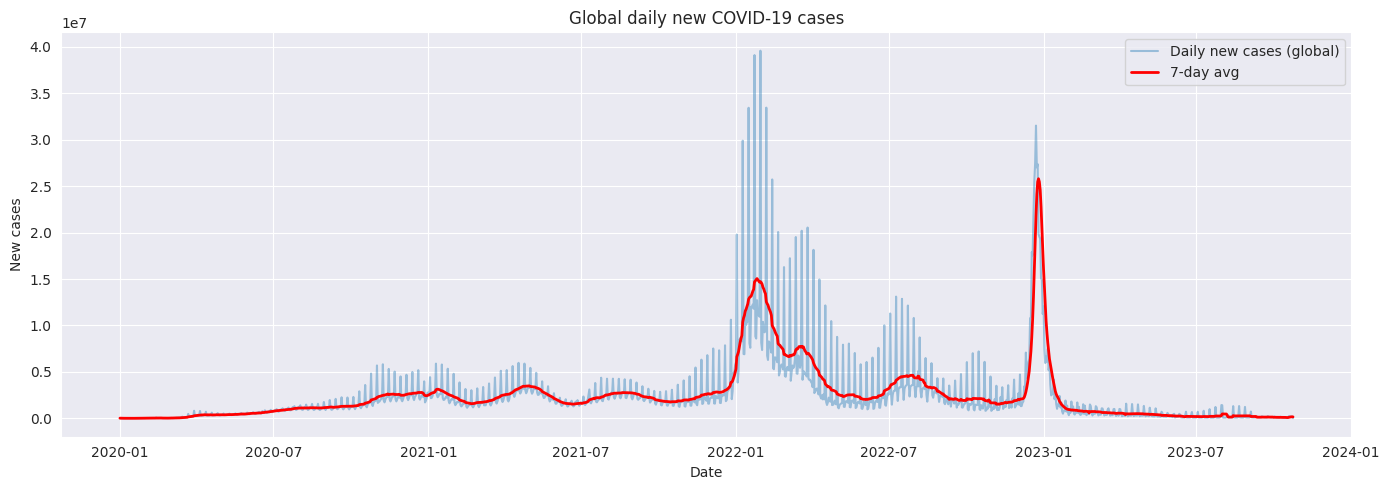

Peak global new cases: 39577994 on 2022-01-30


In [ ]:
if 'date' in df.columns and 'new_cases' in df.columns:
    ts = df.groupby('date', as_index=False)['new_cases'].sum()
    ts['new_cases_7d'] = ts['new_cases'].rolling(7, min_periods=1).mean()

    plt.figure(figsize=(14,5))
    plt.plot(ts['date'], ts['new_cases'], alpha=0.4, label='Daily new cases (global)')
    plt.plot(ts['date'], ts['new_cases_7d'], color='red', linewidth=2, label='7-day avg')
    plt.title("Global daily new COVID-19 cases")
    plt.xlabel("Date")
    plt.ylabel("New cases")
    plt.legend()
    plt.tight_layout()
    plt.show()

    peak_idx = ts['new_cases'].idxmax()
    print("Peak global new cases:", int(ts.loc[peak_idx,'new_cases']), "on", ts.loc[peak_idx,'date'].date())
else:
    print("Cannot compute global time series — 'date' or 'new_cases' missing.")


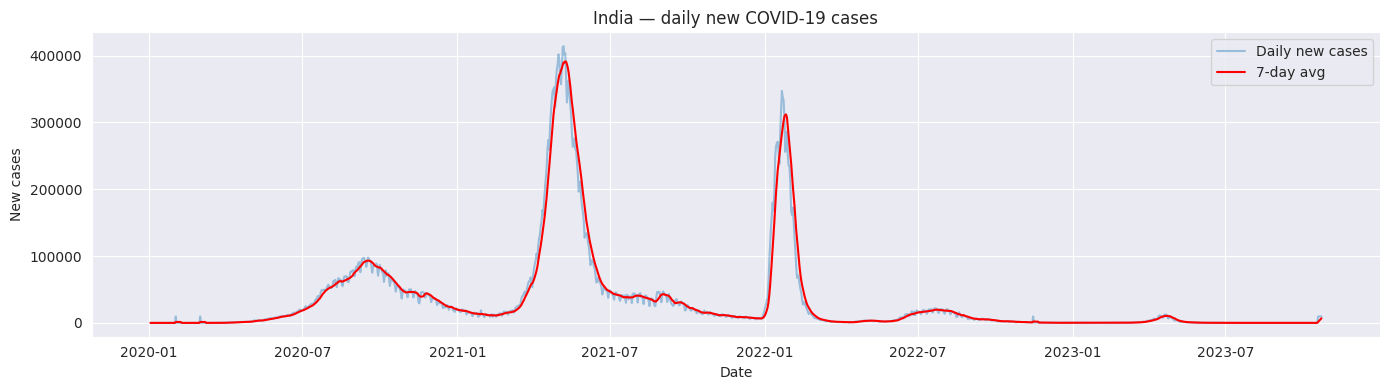

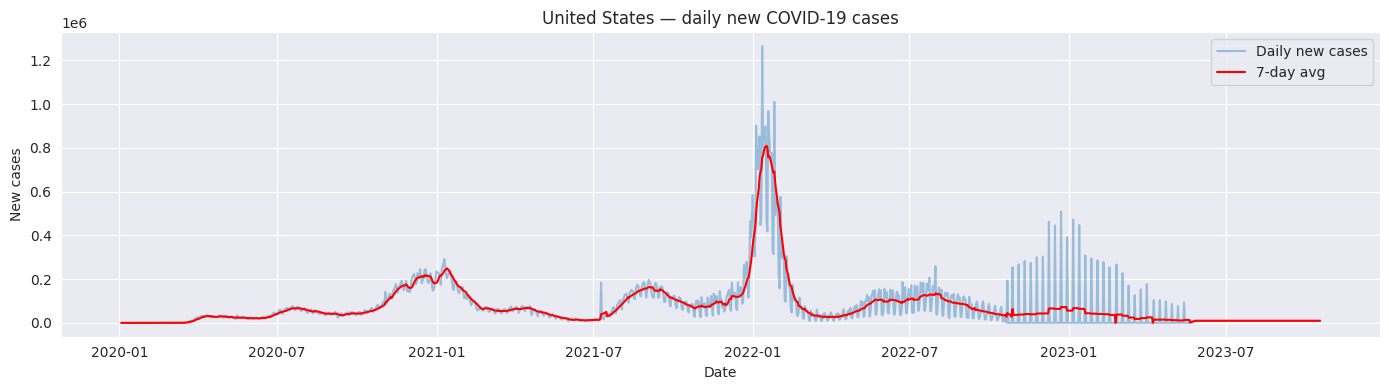

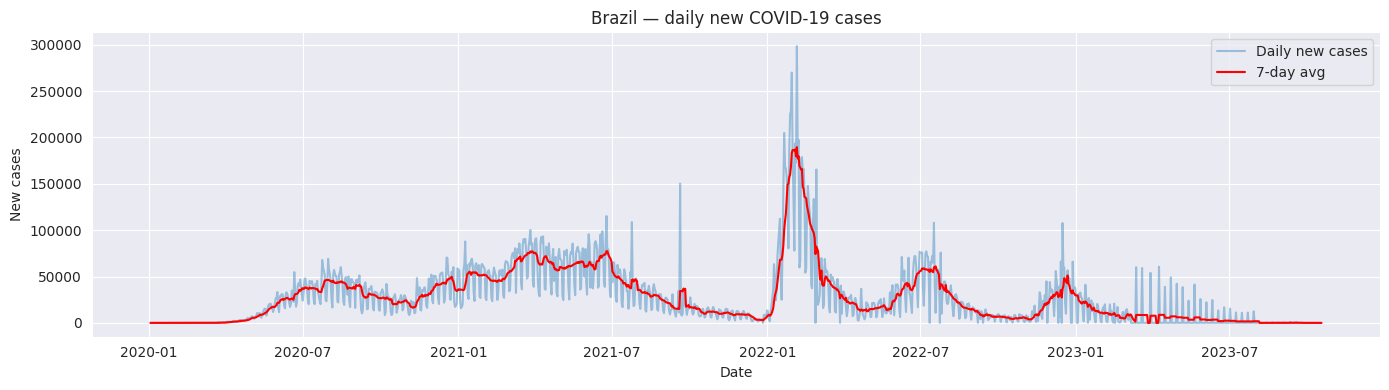

In [ ]:
COUNTRIES = ['India','United States','Brazil']

for country in COUNTRIES:
    if country in df['location'].values:
        cdf = df[df['location']==country].sort_values('date')
        plt.figure(figsize=(14,4))
        plt.plot(cdf['date'], cdf['new_cases'], alpha=0.4, label='Daily new cases')
        plt.plot(cdf['date'], cdf['new_cases'].rolling(7, min_periods=1).mean(), color='red', label='7-day avg')
        plt.title(f"{country} — daily new COVID-19 cases")
        plt.xlabel("Date")
        plt.ylabel("New cases")
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("Country not found:", country)


/tmp/ipython-input-661603585.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='location', x='cases_per_100k', data=top_c100k, palette='rocket')


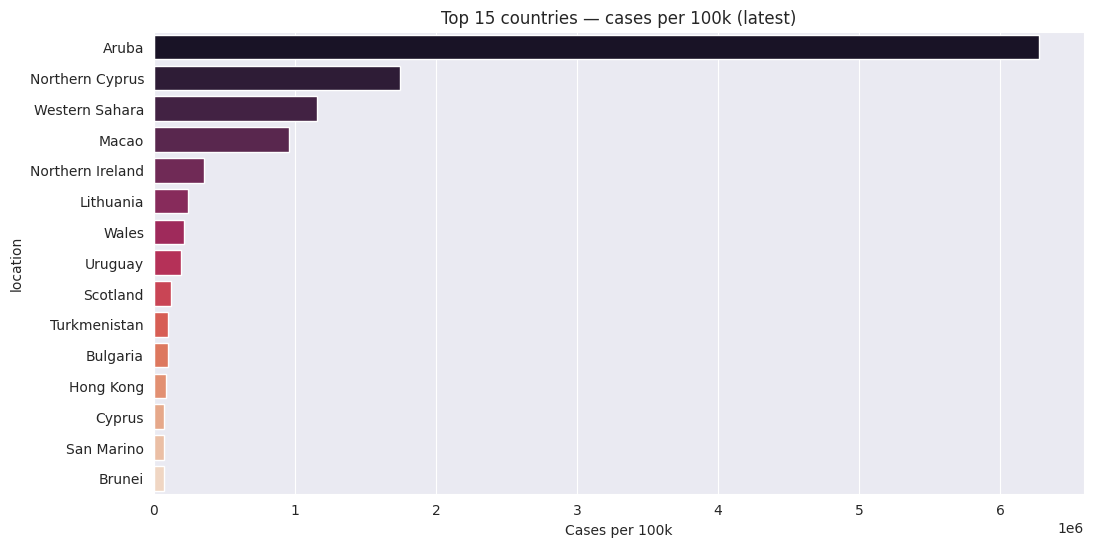

/tmp/ipython-input-661603585.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='location', x='deaths_per_million', data=top_dpm, palette='mako')


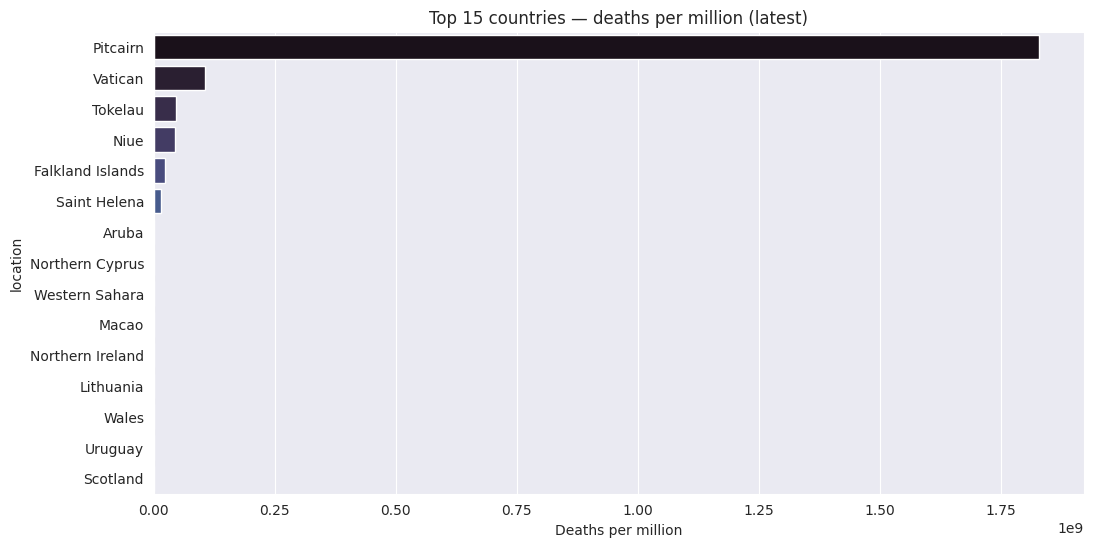

In [ ]:
if 'cases_per_100k' in latest.columns:
    top_c100k = latest.sort_values('cases_per_100k', ascending=False).head(15)
    plt.figure(figsize=(12,6))
    sns.barplot(y='location', x='cases_per_100k', data=top_c100k, palette='rocket')
    plt.title("Top 15 countries — cases per 100k (latest)")
    plt.xlabel("Cases per 100k")
    plt.show()

if 'deaths_per_million' in latest.columns:
    top_dpm = latest.sort_values('deaths_per_million', ascending=False).head(15)
    plt.figure(figsize=(12,6))
    sns.barplot(y='location', x='deaths_per_million', data=top_dpm, palette='mako')
    plt.title("Top 15 countries — deaths per million (latest)")
    plt.xlabel("Deaths per million")
    plt.show()


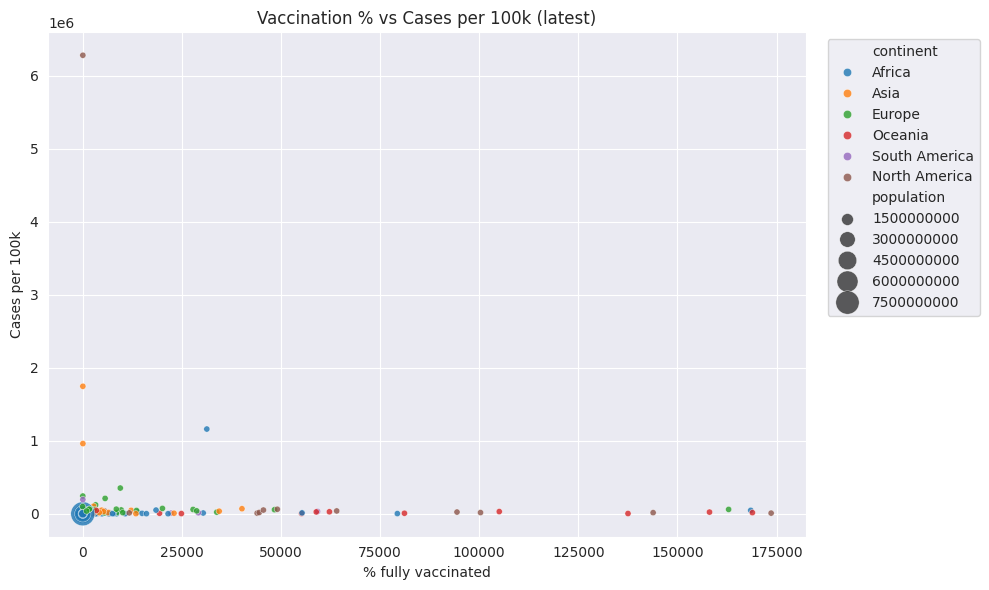

In [ ]:
if 'pct_fully_vaccinated' in latest.columns and 'cases_per_100k' in latest.columns:
    scatter_df = latest[(latest['population']>100000) & latest['pct_fully_vaccinated'].notna() & latest['cases_per_100k'].notna()]
    plt.figure(figsize=(10,6))
    hue = 'continent' if 'continent' in scatter_df.columns else None
    sns.scatterplot(data=scatter_df, x='pct_fully_vaccinated', y='cases_per_100k', size='population', sizes=(20,300), hue=hue, alpha=0.8)
    plt.title("Vaccination % vs Cases per 100k (latest)")
    plt.xlabel("% fully vaccinated")
    plt.ylabel("Cases per 100k")
    plt.legend(bbox_to_anchor=(1.02,1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns for scatter plot are missing.")


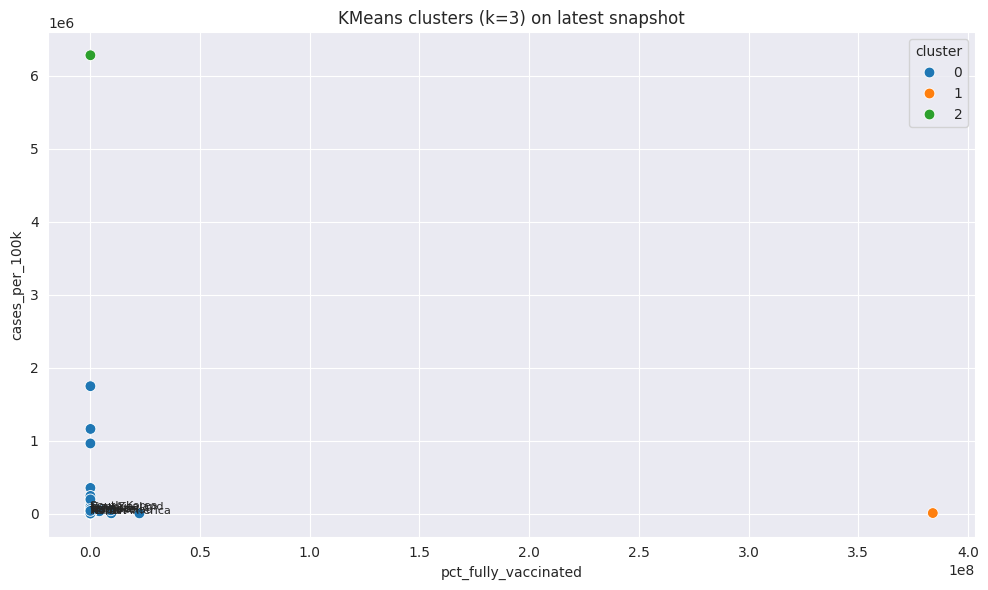

Cluster counts:
 cluster
0    253
1      1
2      1
Name: count, dtype: int64


In [ ]:
features = []
for f in ['pct_fully_vaccinated','cases_per_100k','deaths_per_million']:
    if f in latest.columns:
        features.append(f)

if len(features) >= 2:
    cluster_df = latest.dropna(subset=features)[features].copy()
    scaler = StandardScaler()
    X = scaler.fit_transform(cluster_df.values)
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels = kmeans.fit_predict(X)
    cluster_df['cluster'] = labels
    cluster_df['location'] = latest.loc[cluster_df.index, 'location'].values

    x_feat, y_feat = features[0], features[1]
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=cluster_df[x_feat], y=cluster_df[y_feat], hue=cluster_df['cluster'], palette='tab10', s=60)
    plt.xlabel(x_feat); plt.ylabel(y_feat)
    plt.title("KMeans clusters (k=3) on latest snapshot")
    for i,row in cluster_df.sample(min(10, len(cluster_df)), random_state=1).iterrows():
        plt.text(row[x_feat], row[y_feat], row['location'], fontsize=8)
    plt.tight_layout()
    plt.show()

    print("Cluster counts:\n", cluster_df['cluster'].value_counts())
else:
    print("Not enough features for clustering. Found features:", features)


In [ ]:
CLEAN_PATH = os.path.join(DATA_FOLDER, "cleaned_owid_covid_data.csv")
df.to_csv(CLEAN_PATH, index=False)
print("Saved cleaned dataset to:", CLEAN_PATH)

LATEST_PATH = os.path.join(DATA_FOLDER, "latest_snapshot_per_country.csv")
latest.to_csv(LATEST_PATH, index=False)
print("Saved latest snapshot to:", LATEST_PATH)

insights = []
if 'new_cases' in df.columns:
    overall_ts = df.groupby('date', as_index=False)['new_cases'].sum()
    peak_row = overall_ts.loc[overall_ts['new_cases'].idxmax()]
    insights.append(f"Global peak daily new cases: {int(peak_row['new_cases'])} on {peak_row['date'].date()}")

if 'total_cases' in latest.columns:
    top5_cases = latest.nlargest(5, 'total_cases')['location'].tolist()
    insights.append("Top 5 countries by total cases (latest): " + ", ".join(top5_cases))

if 'deaths_per_million' in latest.columns:
    top5_deaths = latest.nlargest(5, 'deaths_per_million')['location'].tolist()
    insights.append("Top 5 by deaths per million (latest): " + ", ".join(top5_deaths))

if 'pct_fully_vaccinated' in latest.columns:
    high_vax = latest.nlargest(3, 'pct_fully_vaccinated')['location'].tolist()
    low_vax = latest.nsmallest(3, 'pct_fully_vaccinated')['location'].tolist()
    insights.append("Highest vaccination coverage (top 3): " + ", ".join(high_vax))
    insights.append("Lowest vaccination coverage (bottom 3): " + ", ".join(low_vax))

print("\n=== Suggested analyst insights ===")
for i, s in enumerate(insights, 1):
    print(f"{i}. {s}")


Saved cleaned dataset to: /content/drive/MyDrive/colab_datasets/cleaned_owid_covid_data.csv
Saved latest snapshot to: /content/drive/MyDrive/colab_datasets/latest_snapshot_per_country.csv

=== Suggested analyst insights ===
1. Global peak daily new cases: 39577994 on 2022-01-30
2. Top 5 countries by total cases (latest): United States, China, France, Germany, Brazil
3. Top 5 by deaths per million (latest): Pitcairn, Vatican, Tokelau, Niue, Falkland Islands
4. Highest vaccination coverage (top 3): Pitcairn, Vatican, Tokelau
5. Lowest vaccination coverage (bottom 3): Africa, China, Low income
